In [6]:
import numpy as np
import matplotlib.pyplot as plt

**Backtracking Line Search**

In [7]:
# Backtracking line search function for the 
def backtracking_line_search(f, grad_f, x, p, alpha=1.0, beta=0.5, c=1e-4):
    previous_alpha = [alpha]  
    while f(x + alpha * p) > f(x) + c * alpha * np.dot(grad_f(x), p):
        alpha *= beta
        previous_alpha.append(alpha)
    return alpha, previous_alpha

**Gradient Descent**

In [8]:
def gradient_descent_step(grad_f, x, alpha):
    return x - alpha * grad_f(x)

**Newton Method**

In [9]:
# Newton's method step with Hessian modification
def is_positive_definite(H):
    try:
        np.linalg.cholesky(H)
        return True
    except np.linalg.LinAlgError:
        return False

def newton_step(grad_f, hessian_f, x, gamma=1e-4):
    H = hessian_f(x)
    
    if np.isscalar(H):
        H = np.array([[H]], dtype=np.float64)
        grad = np.array([grad_f(x)], dtype=np.float64)
    else:
        H = H.astype(np.float64)
        grad = grad_f(x)
    
    I = np.eye(H.shape[0])
    while not is_positive_definite(H):
        H += gamma * I
    
    p_k = np.linalg.solve(H, -grad)
    
    return x + p_k if not np.isscalar(x) else x + p_k[0]

**Minimization of the Functions**

In [10]:
# General minimization function
def minimize(f, grad_f, hessian_f=None, x0=np.array([0]), method="gradient_descent", tol=1e-6, max_iter=1000):
    x = x0
    previous_distance = []
    previous_alpha = []
    for _ in range(max_iter):
        grad = grad_f(x)
        previous_distance.append(np.linalg.norm(grad))
        
        if np.linalg.norm(grad) < tol:
            break
        
        if method == "gradient_descent":
            p = -grad
            alpha, alpha_history = backtracking_line_search(f, grad_f, x, p)
            x = gradient_descent_step(grad_f, x, alpha)
            previous_alpha.extend(alpha_history)
        elif method == "newton" and hessian_f is not None:
            x = newton_step(grad_f, hessian_f, x)
    
    return x, previous_distance, previous_alpha

**Function 1:**

Minimization using Gradient Descent for f1: 1.0157627283437165
Minimization using Newton's Method for f1: 1.0


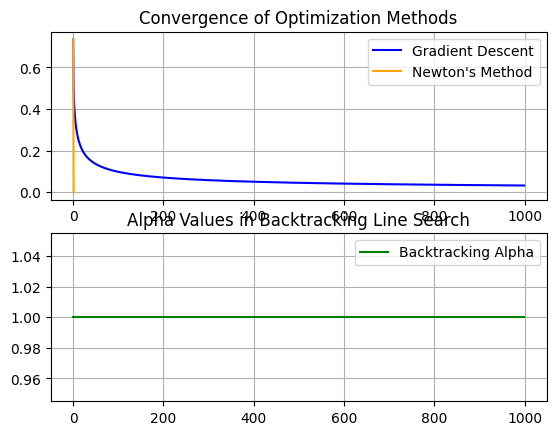

In [11]:
def f1(x):
    return -np.exp(-(x-1)**2)

def grad_f1(x):
    return 2 * (x-1) * np.exp(-(x-1)**2)

def hessian_f1(x):
    return 2 * np.exp(-(x-1)**2) * (2 * (x-1)**2 - 1)

# Initial point
x0_f1 = 0

# Minimize f1 and track history
x_f1_min_gd, history_gd, previous_alpha_gd = minimize(f1, grad_f1, x0=x0_f1, method="gradient_descent")
x_f1_min_newton, history_newton, _ = minimize(f1, grad_f1, hessian_f1, x0=x0_f1, method="newton")

print("Minimization using Gradient Descent for f1:", x_f1_min_gd)
print("Minimization using Newton's Method for f1:", x_f1_min_newton)

# Plot 1: Convergence of each method
plt.subplot(2, 1, 1)
plt.plot(history_gd, label="Gradient Descent", color='blue')
plt.plot(history_newton, label="Newton's Method", color='orange')
plt.title('Convergence of Optimization Methods')
plt.legend()
plt.grid(True)

# Plot 2: Alpha values in backtracking line search
plt.subplot(2, 1, 2)
plt.plot(previous_alpha_gd, label="Backtracking Alpha", color='green')
plt.title('Alpha Values in Backtracking Line Search')
plt.legend()
plt.grid(True)

**Function 2:**

Minimization using Gradient Descent for f2: [1.0127633  1.02536825]
Minimization using Newton's Method for f2: [1. 1.]


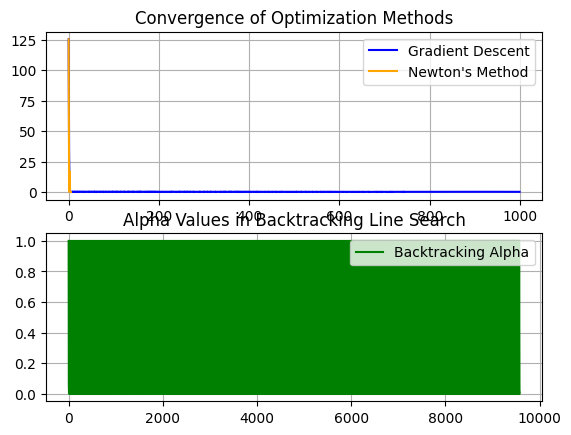

In [12]:
def f2(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def grad_f2(x):
    grad_x = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
    grad_y = 200 * (x[1] - x[0]**2)
    return np.array([grad_x, grad_y])

def hessian_f2(x):
    hessian = np.zeros((2, 2))
    hessian[0, 0] = 2 - 400 * x[1] + 1200 * x[0]**2
    hessian[0, 1] = hessian[1, 0] = -400 * x[0]
    hessian[1, 1] = 200
    return hessian

# Initial point
x0_f2 = np.array([1.2, 1.2])


# Minimize f1 and track history
x_f2_min_gd, history_gd, previous_alpha_gd = minimize(f2, grad_f2, x0=x0_f2, method="gradient_descent")
x_f2_min_newton, history_newton, _ = minimize(f2, grad_f2, hessian_f2, x0=x0_f2, method="newton")

print("Minimization using Gradient Descent for f2:", x_f2_min_gd)
print("Minimization using Newton's Method for f2:", x_f2_min_newton)

# Plot 1: Convergence of each method
plt.subplot(2, 1, 1)
plt.plot(history_gd, label="Gradient Descent", color='blue')
plt.plot(history_newton, label="Newton's Method", color='orange')
plt.title('Convergence of Optimization Methods')
plt.legend()
plt.grid(True)

# Plot 2: Alpha values in backtracking line search
plt.subplot(2, 1, 2)
plt.plot(previous_alpha_gd, label="Backtracking Alpha", color='green')
plt.title('Alpha Values in Backtracking Line Search')
plt.legend()
plt.grid(True)

**Function 3:**

Minimization using Gradient Descent for f3: [ 0.25 -0.25]
Minimization using Newton's Method for f3: [ 0.25 -0.25]


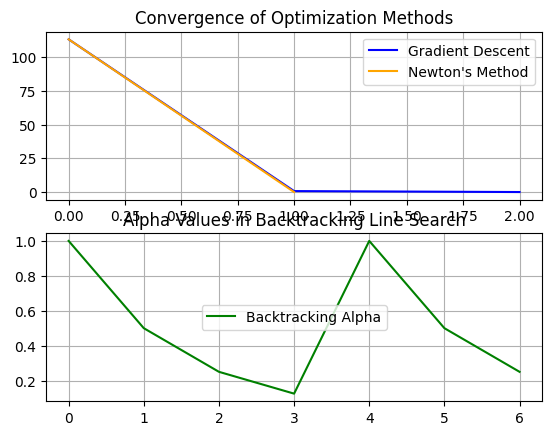

In [79]:
A = np.array([[3, 1], [1, 3]])
b = np.array([-1, 1])

def f3(x):
    return np.dot(x.T, np.dot(A, x)) + np.dot(b, x)

def grad_f3(x):
    return 2 * np.dot(A, x) + b

def hessian_f3(x):
    return 2 * A

# Initial point
x0_f3 = np.array([10, 10])


x_f3_min_gd, history_gd, previous_alpha_gd = minimize(f3, grad_f3, x0=x0_f3, method="gradient_descent")
x_f3_min_newton, history_newton, _ = minimize(f3, grad_f3, hessian_f3, x0=x0_f3, method="newton")

print("Minimization using Gradient Descent for f3:", x_f3_min_gd)
print("Minimization using Newton's Method for f3:", x_f3_min_newton)

# Plot 1: Convergence of each method
plt.subplot(2, 1, 1)
plt.plot(history_gd, label="Gradient Descent", color='blue')
plt.plot(history_newton, label="Newton's Method", color='orange')
plt.title('Convergence of Optimization Methods')
plt.legend()
plt.grid(True)

# Plot 2: Alpha values in backtracking line search
plt.subplot(2, 1, 2)
plt.plot(previous_alpha_gd, label="Backtracking Alpha", color='green')
plt.title('Alpha Values in Backtracking Line Search')
plt.legend()
plt.grid(True)

**Function 4:**

Minimization using Gradient Descent for f4: [ 7.63086083e+144 -1.23469922e+145 -4.20941298e+144]
Minimization using Newton's Method for f4: [nan nan nan]


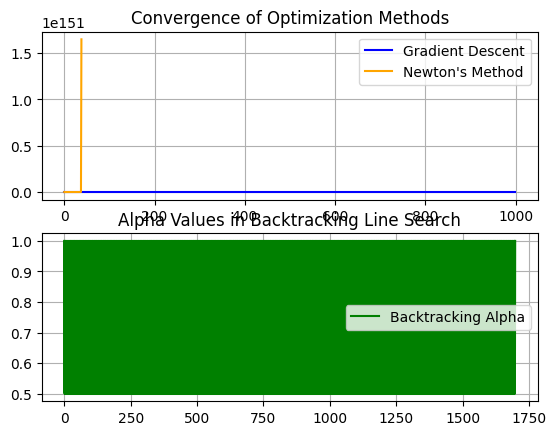

In [80]:
B = np.array([[1, 1, 0], [1, 0, 0], [0, 0, 4]])
c = np.array([0, 0, 1])

def f4(x):
    return 0.5 * np.dot(x.T, np.dot(B, x)) - np.dot(c, x)

def grad_f4(x):
    return np.dot(B, x) - c

def hessian_f4(x):
    return B

# Initial point
x0_f4 = np.array([-10, -10, -10])


x_f4_min_gd, history_gd, previous_alpha_gd = minimize(f4, grad_f4, x0=x0_f4, method="gradient_descent")
x_f4_min_newton, history_newton, _ = minimize(f4, grad_f4, hessian_f4, x0=x0_f4, method="newton")

print("Minimization using Gradient Descent for f4:", x_f4_min_gd)
print("Minimization using Newton's Method for f4:", x_f4_min_newton)

# Plot 1: Convergence of each method
plt.subplot(2, 1, 1)
plt.plot(history_gd, label="Gradient Descent", color='blue')
plt.plot(history_newton, label="Newton's Method", color='orange')
plt.title('Convergence of Optimization Methods')
plt.legend()
plt.grid(True)

# Plot 2: Alpha values in backtracking line search
plt.subplot(2, 1, 2)
plt.plot(previous_alpha_gd, label="Backtracking Alpha", color='green')
plt.title('Alpha Values in Backtracking Line Search')
plt.legend()
plt.grid(True)

The optimum for Gradient Descent, as well as Newton method has been printed at the end of each cell of the function in the code above, after which I have demonstrated the plots for convergence and alpha.  
**The stopping criterion** for both algorithms is based on the norm of the gradient being less than a tolerance of 1e-6.